In [ ]:
#import the required libraries
import cv2
import matplotlib.pyplot
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
from cv2 import matchTemplate
from cv2 import minMaxLoc


In [ ]:
from cv2 import cvtColor

In [9]:
from google.colab.patches import cv2_imshow

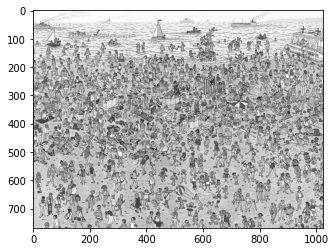

In [11]:
#Opening and converting to grayscale
src = cv2.imread("/content/wheres_waldo.jpg")
src = cv2.cvtColor(src, cv2.COLOR_RGB2GRAY)
Temp = cv2.imread("/content/waldo.png") 
temp = cv2.cvtColor(Temp, cv2.COLOR_RGB2GRAY) 
plt.imshow(src, cmap='gray')

In [12]:
#As we can note the grayscale image possess a 2D Array
print(src)

[[248 249 249 ... 249 249 249]
 [247 247 247 ... 249 249 249]
 [245 245 245 ... 249 249 249]
 ...
 [220 219 216 ... 193 194 115]
 [226 223 220 ... 124 115 156]
 [223 222 224 ...  38 150 216]]


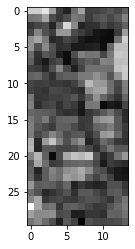

In [13]:
plt.imshow(temp, cmap='gray')

In [14]:
#Assigning height width variables to source image
height, width =src.shape
height, width 

(768, 1024)

In [15]:
#Assigning height width variables to walo's identifier image
H, W = temp.shape
H, W 

(30, 14)

In [16]:
methods = [cv2.TM_CCOEFF, cv2.TM_CCOEFF_NORMED] 

(2, 470) (2, 455)


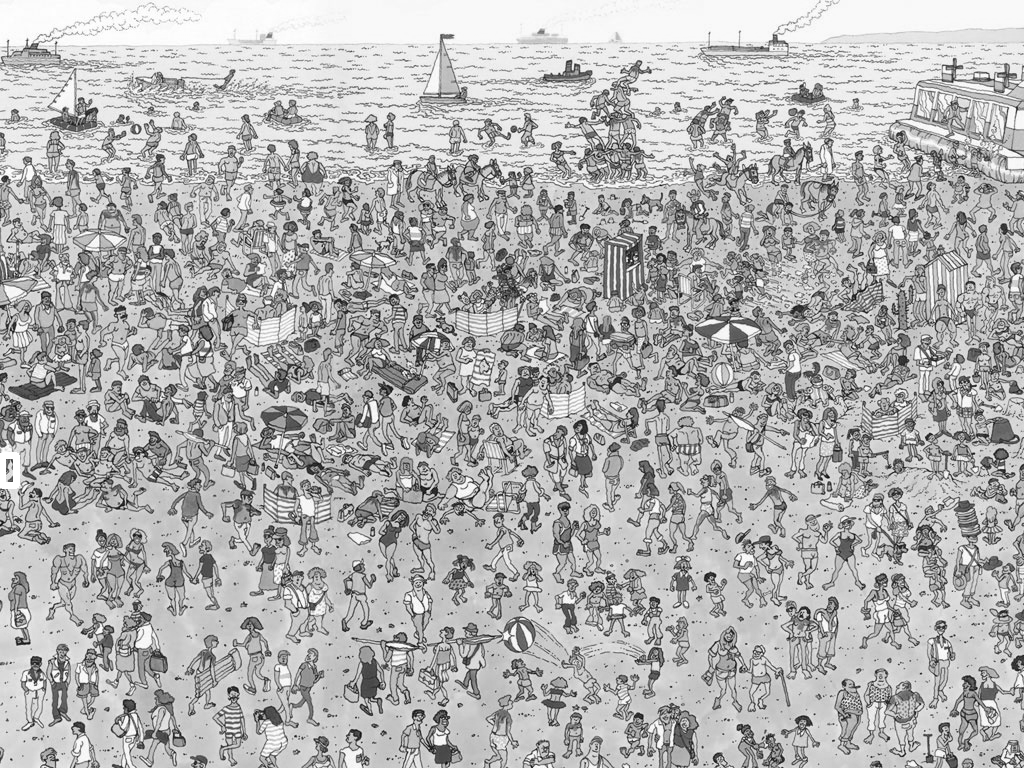

(543, 600) (499, 266)


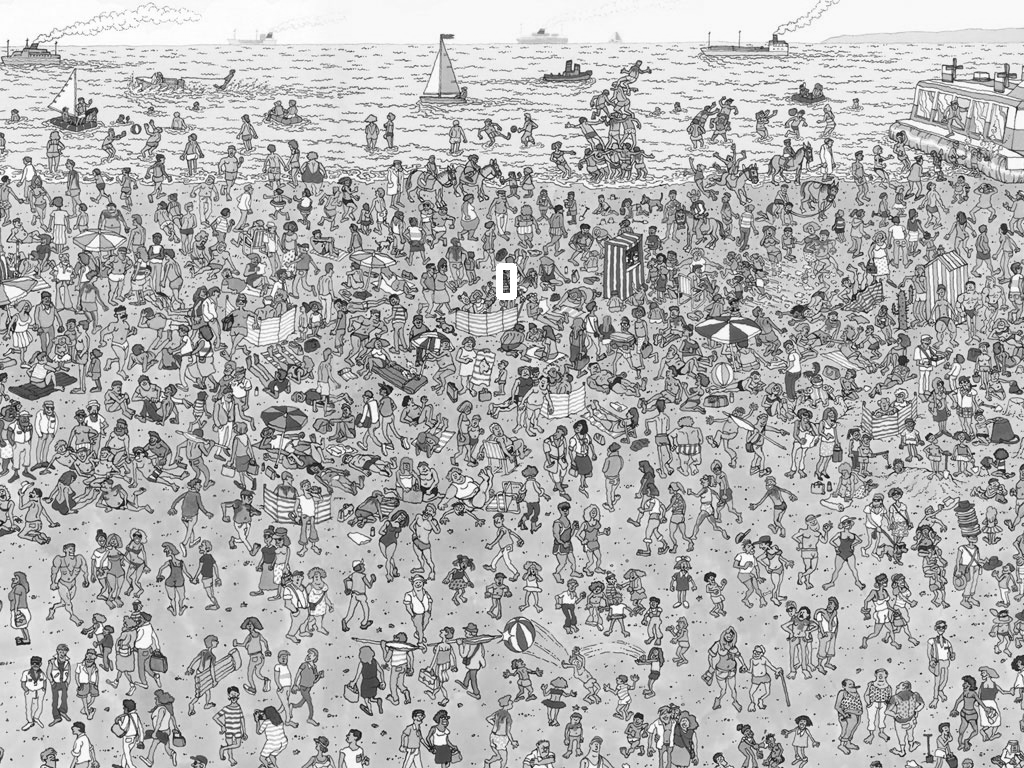

(363, 665) (0, 5)


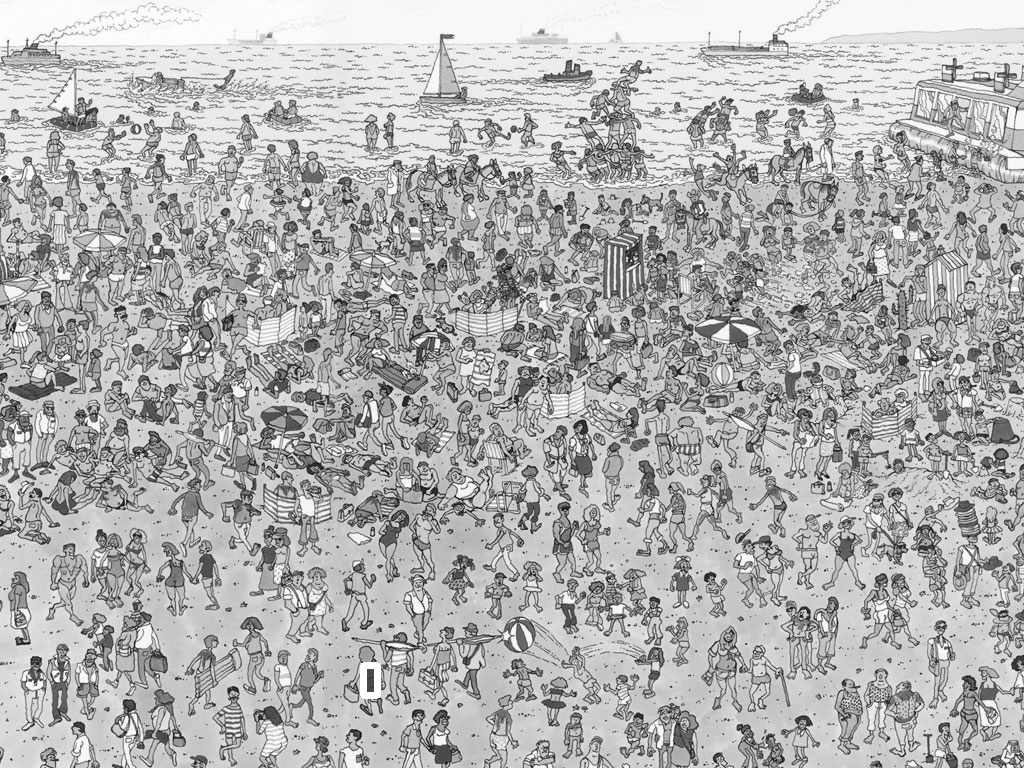

(625, 241) (260, 32)


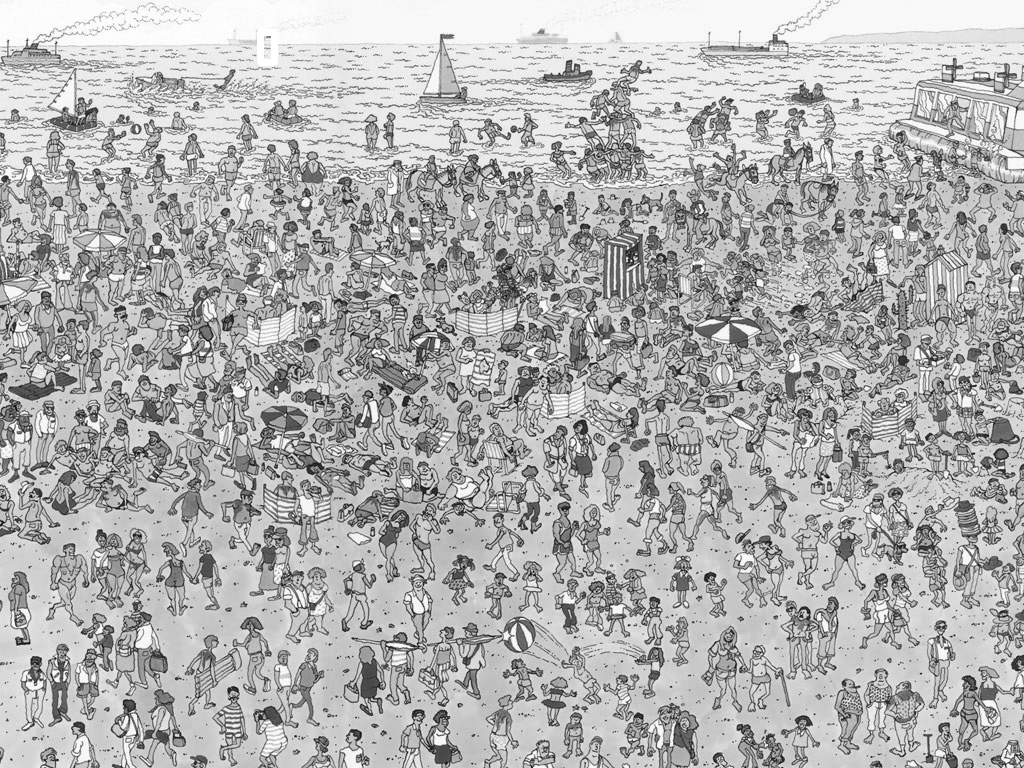

(499, 265) (0, 5)


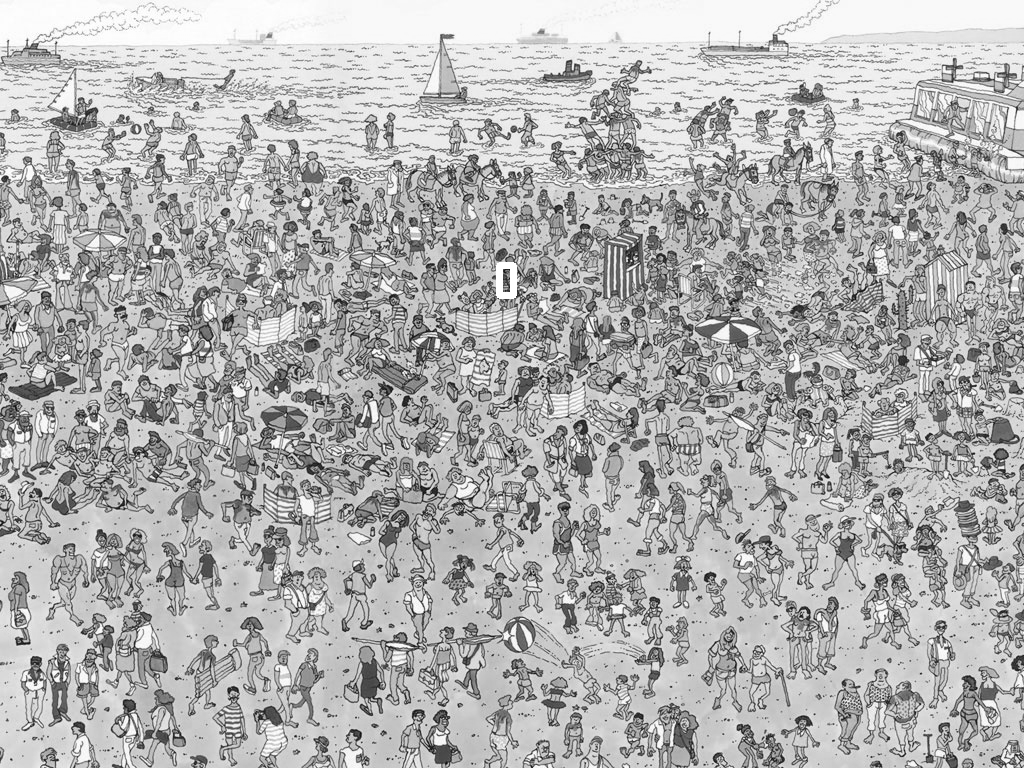

(499, 265) (0, 0)


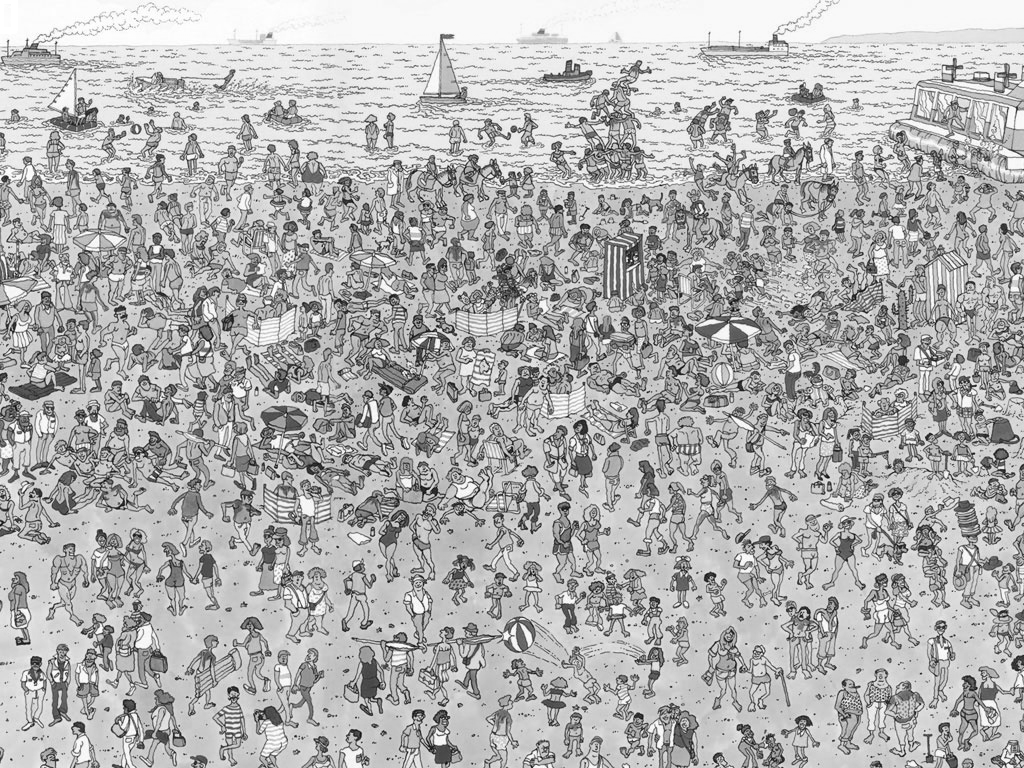

In [17]:
 for method in methods:
    src2 = src.copy()
    result = cv2.matchTemplate(src2, temp, method)#matches the pixels from the given template with the image
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
    print(min_loc, max_loc)
    if method in [cv2.TM_SQDIFF,cv2.TM_CCORR]:
        location = min_loc
    else:
        location = max_loc
    bottom_right = (location[0] + W, location[1] + H)
    cv2.rectangle(src2, location,bottom_right, 255, 5)
    cv2_imshow(src2)#shows the output image forming a rectangle around the match
    cv2.waitKey(0)
    cv2.destroyAllWindows()